# The simple model 5
Был использован GridSearchCV для посика наилучших параметров, bootstrap = False

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

!pip install matminer;

In [ ]:
data = pd.read_csv('3DSC_MP.csv', header = 1)
data1 = data.loc[data['tc'] < 10.0]
data_t = data1[['tc']]
data2 = data1[['formula_sc']]
data2

In [ ]:
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.conversions import StrToComposition
ep_feat = ElementProperty.from_preset(preset_name="magpie")
d = {"element": np.array(data2)[:, 0]}
df = pd.DataFrame(d)

df = StrToComposition().featurize_dataframe(df, "element")
df = ep_feat.featurize_dataframe(df, col_id = 'composition')
df

In [ ]:
pd.set_option('display.max_columns', 200)
df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['MagpieData mean AtomicWeight', 'MagpieData mean MeltingT',
'MagpieData mean Electronegativity', 'MagpieData mean NdValence', 'MagpieData mean GSvolume_pa', 'MagpieData mean SpaceGroupNumber', 'MagpieData mean NdUnfilled']], data_t, test_size=0.3, random_state=85)

param_grid = { 
            "n_estimators"      : [30, 100, 300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
rfr = RandomForestRegressor()
CV_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5)
CV_rfr.fit(X_train, y_train)

In [26]:
CV_rfr.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [37]:
rfr1 = RandomForestRegressor(max_features = 'sqrt', min_samples_split = 2, bootstrap = False, n_estimators = 100)
rfr1.fit(X_train, y_train)
predictions = rfr1.predict(X_test)
predictions1 = rfr1.predict(X_train)

<ipython-input-37-475585d42315>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(X_train, y_train)


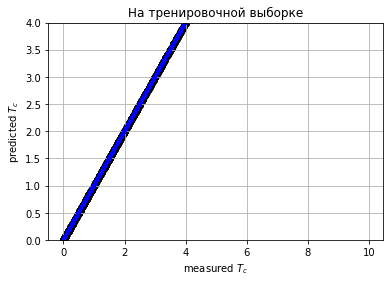

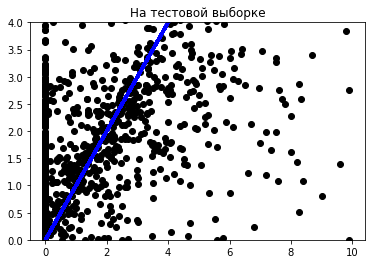

In [38]:
fig, ax = plt.subplots()
ax.grid()

plt.scatter(y_train, predictions1, color = 'black')
plt.plot(y_train, y_train, color = 'blue', linewidth = 3)
ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')
plt.title("На тренировочной выборке")
plt.ylim((0, 4))
plt.show()


plt.scatter(y_test, predictions, color = 'black')
plt.plot(y_test, y_test, color = 'blue', linewidth = 3)
ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')
plt.title("На тестовой выборке")
plt.ylim((0, 4))
plt.show()